```yaml
Author:    Chris Longchamp
Email:     tdj5xk@virginia.edu
Course:    DS 5001 
Date:      Spring 2023
```

# Introduction

### The Corpus that was selected for analysis was of three early 1900s writers. The three writers that have texts in the corpus were Ernest Hemingway, F. Scott Fitzgerald, and Virginia Woolf. These three authors were very influential figures at the time and are still three widely read authors today. While Hemingway and Fitzgerald were American writers and produced most of their work in America, Woolf was from the United Kingdom. Thus, the project is focused on trying to identify similarities and differences between these three authors writing styles. Some of the questions that were asked of the data was are Hemingway and Fitzgerald's pieces similar to one another, was Woolf's pieces different from Hemingway and Fitzgerald's in terms of style, and what topics were most prevalent in the three writers work. The pieces were also looked at to determine if the sentiment of the pieces were different from one another or were the same.  

# Source Data

### The data of these three authors comes from the Project Gutenberg collection. This collection is known to be one of the biggest digitized records of novels and short stories. The link to the Project Gutenberg website is as follows https://www.gutenberg.org/. The data files were in the form of `.txt` files and were stored in the repository in a folder called `final-set`. The original `.txt` files can also be found on the UVA Box Account by following the link https://virginia.box.com/s/vkrb61ozwx0jir78ele07x9pxcazwzl8. The data consists of both some fiction and nonfiction works by the three authors that include novels and short stories. To simplify the corpus, the short stories were treated as chapters. Overall, there were 13 works that were tokenized. There were three Hemingway works, four Fitzgerald works, and six Woolf works. The works total had 780,192 tokens. The average length of all of the works is around 60,000 tokens. The data was originally in plaintext files until it was tokenized.    

# Data Model

### All of the tables described below can be found at this link https://virginia.box.com/s/9k2znz8rh6nvsje0kr599wv9kd7w6i3l.

### There were many different steps that needed to be taken in order to get the corpus tokenized using the `nltk` package. First, I tried running the tokenizer and seeing where the regular expressions would break the code. Then, I would have to go back and fix the regular expressions when the tokenizer would fail. After, if the regular expressions continued to fail, I would go back and change the text files. Lastly, if that did not work, I removed the text file from the corpus altogether. After every successful runthough the tokenizer, I would also inspect the corpus of each individual work to ensure that the tokenizer chunked the chapters how I wanted it to. Eventually, I was able to get the corpus tokenized through `nltk` and then continued on to the annotation of the corpus. Below is a description of the CORPUS table with the following columns. 

| variable  | type   | description                                                         |   
|-----------|--------|---------------------------------------------------------------------|
| book_id   | int    | The unique ID for each text in the corpus                           |   
| chap_id   | int    | The chapter number within each text                                 | 
| para_num  | int    | The paragraph number within each text and chapter                   |   
| sent_num  | int    | The sentence number within each text, chapter, and paragraph        | 
| token_num | int    | The token number within each text, chapter, paragraph, and sentence | 
| pos_tuple | object | A tuple containing the token and the part of speech of that token   | 
| pos       | object | The part of speech the token is                                     | 
| token_str | object | The token string of the word                                        | 
| term_str  | object | The term string of the word or the token string lowercase           | 
| pos_group | object | The group each part of speech belongs to                            | 

### After the corpus was tokenized, I needed to annotate the vocabulary of words used. Therefore, I first needed to create the vocabulary table by taking the value counts of each term in the corpus and sending that value counts structure to a dataframe. Next, I added important features such as how long each term was, what was the most frequent part of speech for the term, and how many different parts of speech the term took on. Other statistical information was added such as the probability of a term and information for each term. The stemming and lemmanizations were also added to the vocabulary table along with stopwords and dfidf. Below is the features in the vocabulary table.

| variable       | type   | description                                                             |
|----------------|--------|-------------------------------------------------------------------------|
| n              | int    | Number of times the term appears in the Corpus                          |
| n_chars        | int    | Number of characters in the term                                        |
| p              | float  | The probability the term occurs                                         |
| i              | float  | The information value of the term or the inverse log of the probability |
| max_pos        | object | The part of speech the term takes on most often                         |
| n_pos          | int    | The number of parts of speech the term takes on                         |
| max_pos_group  | object | The part of speech group the term is associated with the most           |
| stop           | int    | A binary indicating if the term is a stop word or not                   |
| stem_porter    | object | The Porter stemming of the term                                         |
| stem_snowball  | object | The Snowball stemming of the term                                       |
| stem_lancaster | object | The Lancaster stemming of the term                                      |
| tfidf_mean     | float  | The mean TFIDF for each term                                            |
| dfidf          | float  | The DFIDF for each term                                                 |


### A third table that I built off of the corpus and the vocabulary tables was the LIB table. This table has generic information about the works stored in it such as the book_id, the author, the title, and many more attributes. After the corpus was constructed, I added the book length column to calculate how many tokens were in each text. I also added the regular expressions that I used in the tokenization of the corpus as a column as well. Below is the features in the LIB table.


| Variable | Type    | Description                                |
|----------|---------|--------------------------------------------|
| source_file_path | object | Path of the source file |
| author | object | Name of the author |
| title | object | Title of the book |
| chap_regex | object | Regular expression for chapter headings |
| author_key | object | Unique identifier for the author |
| book_len | int64 | Length of the book in number of pages |
| label | object | Label for the book |
| title_short | object | Shortened version of the book title |



### A fourth table I built in the analysis was the Bag of Words table which included columns such as term frequency, TFIDF, and other metrics that are used in the Bag of Words Hypothesis. The index of this table was both `book_id` and `chap_id` since the bag that was used for analysis was the chapter. The table with the features of the Bag of Words table can be found below.


| Variable | Type    | Description                             |
|----------|---------|-----------------------------------------|
| n        | int64   | Number of occurrences of a term in a document |
| tf       | float64 | Term Frequency (TF) score of the term in the document |
| tfidf    | float64 | TF-IDF score of the term in the document |



### A fifth table I built for analysis was the DOC table. The DOC table has information about the title and the author of the work with the index of the OHCO used in the Bag of Words table (`book_id` and `chap_id`). The description of the DOC table can be found below.


| Variable | Type    | Description                          |
|----------|---------|--------------------------------------|
| author   | object  | Name of the author of the work       |
| title    | object  | Title of the work                    |


### A sixth table I built for the analysis was the TFIDF_TABLE. This table had the top 1000 nouns sorted by dfidf for the columns and the OHCO indexing with `book_id` and `chap_id`.  

### A seventh, eighth, and ninth tables I made for analysis were the loadings, dcm, and comps tables. These tables are crucial for Principal Components Analysis. The loadings table contains an index of the top 1000 nouns by dfidf value. The columns are the principal components. The dcm table relates the topics to the documents. For the index of this table, it is the OHCO index based on the specified bag which was `book_id` and `chap_id`. The columns are the principal components and some other information used in the plotting of the principal components. The comps table relates the terms to the principal components. The comps table has the top 1000 nouns by dfidf value as columns with one added column for the eigenvalues for the eigenvectors along with the principal components as the index of the table. The descritpion of the loadings and dcm tables are below, the comps table was not described due to its large amount of columns.      

### Loadings

| Variable | Type    | Description                            |
|----------|---------|----------------------------------------|
| PC0      | float64 | Value of the first principal component |
| PC1      | float64 | Value of the second principal component |
| PC2      | float64 | Value of the third principal component |
| PC3      | float64 | Value of the fourth principal component |
| PC4      | float64 | Value of the fifth principal component |
| PC5      | float64 | Value of the sixth principal component |
| PC6      | float64 | Value of the seventh principal component |
| PC7      | float64 | Value of the eighth principal component |
| PC8      | float64 | Value of the ninth principal component |
| PC9      | float64 | Value of the tenth principal component |

### DCM

| Variable | Type    | Description                                |
|----------|---------|--------------------------------------------|
| PC0      | float64 | Value of the first principal component     |
| PC1      | float64 | Value of the second principal component    |
| PC2      | float64 | Value of the third principal component     |
| PC3      | float64 | Value of the fourth principal component    |
| PC4      | float64 | Value of the fifth principal component     |
| PC5      | float64 | Value of the sixth principal component     |
| PC6      | float64 | Value of the seventh principal component   |
| PC7      | float64 | Value of the eighth principal component    |
| PC8      | float64 | Value of the ninth principal component     |
| PC9      | float64 | Value of the tenth principal component     |
| author   | object  | Name of the author of the document         |
| title    | object  | Title of the document                      |
| doc      | object  | Title and Chapter Label of document        |



### A ninth, tenth, and eleventh tables I made for the analysis was the theta, phi and topics tables. These three tables are used for topic modeling. The theta table has the index of the OHCO with the columns being the topics. The phi table has topics as the index with terms as the columns. The topics table has the index as the topics and the columns as related words to the topics, document weight sum, term frequency, and columns for how much each topic is related to each author. There is also a column for visualizaiton with the topic modeling called label. The description of the theta and topics tables are below, but the phi table has 4000 columns and they are the nouns in the corpus and was not described due to the amount of columns.

### Theta


| Variable | Type    | Description                  |
|----------|---------|------------------------------|
| T00      | float64 | Topic Association for Topic 1 |
| T01      | float64 | Topic Association for Topic 2 |
| T02      | float64 | Topic Association for Topic 3 |
| T03      | float64 | Topic Association for Topic 4 |
| T04      | float64 | Topic Association for Topic 5|
| T05      | float64 | Topic Association for Topic 6 |
| T06      | float64 | Topic Association for Topic 7 |
| T07      | float64 | Topic Association for Topic 8|
| T08      | float64 | Topic Association for Topic 9|
| T09      | float64 | Topic Association for Topic 10|
| T10      | float64 | Topic Association for Topic 11|
| T11      | float64 | Topic Association for Topic 12|
| T12      | float64 | Topic Association for Topic 13|
| T13      | float64 | Topic Association for Topic 14|
| T14      | float64 | Topic Association for Topic 15|
| T15      | float64 | Topic Association for Topic 16|
| T16      | float64 | Topic Association for Topic 17|
| T17      | float64 | Topic Association for Topic 18|
| T18      | float64 | Topic Association for Topic 19|
| T19      | float64 | Topic Association for Topic 20|

### Topics

| Variable        | Type     | Description                                      |
|-----------------|----------|--------------------------------------------------|
| 0               | object   | Word 1 that is associated with Topic               |
| 1               | object   | Word 2 that is associated with Topic               |
| 2               | object   | Word 3 that is associated with Topic               |
| 3               | object   | Word 4 that is associated with Topic               |
| 4               | object   | Word 5 that is associated with Topic               |
| 5               | object   | Word 6 that is associated with Topic               |
| 6               | object   | Word 7 that is associated with Topic               |
| label           | object   | A label containing the topic number and the words associated with the topic                |
| doc_weight_sum  | float64  | The sum of the Document Weight for each Topic              |
| term_freq       | float64  | The term frequency for each Topic              |
| fitzgerald      | float64  | How much each topic is associated with Fitzgerald             |
| hemingway       | float64  | How much each topic is associated with Hemingway |
| woolf           | float64  | How much each topic is associated with Woolf |

### A twelfth, thirteenth, and fourteenth tables I made for the analysis of the corpus were lib tables for each author. These tables are useful for the word2vec model. These tables were indexed by using `book_id` from the OHCO indexing and contained metadata about the text such as author, length of text, title of the work, where the work is stored, and other information. The table describing these tables are below.

### Author Lib Tables

| Variable           | Type    | Description                                          |
|--------------------|---------|------------------------------------------------------|
| source_file_path   | object  | File path of the source document                      |
| author             | object  | Author of the book                            |
| title              | object  | Title of the book                             |
| chap_regex         | object  | Regular expression to identify chapter headings       |
| author_key         | object  | Key used to identify the author in the visualization         |
| book_len           | int64   | Length of the book/chapter in characters              |
| label              | object  | Label assigned that contains author and title of work |

### A fifteenth, sixteenth, and seventeenth tables I made for the analysis were the corpus tables for each author. These tables were used in the word2vec model which will be discussed in the exploration section. Each table has the OHCO indexing for the books from each author along with tokens, terms, part of speech, part of speech tuple, and part of speech group. The tables describing the features in these three tables are below.    

### Author Corpus Tables

| variable  | type   | description                                                         |   
|-----------|--------|---------------------------------------------------------------------|
| book_id   | int    | The unique ID for each text in the corpus                           |   
| chap_id   | int    | The chapter number within each text                                 | 
| para_num  | int    | The paragraph number within each text and chapter                   |   
| sent_num  | int    | The sentence number within each text, chapter, and paragraph        | 
| token_num | int    | The token number within each text, chapter, paragraph, and sentence | 
| pos_tuple | object | A tuple containing the token and the part of speech of that token   | 
| pos       | object | The part of speech the token is                                     | 
| token_str | object | The token string of the word                                        | 
| term_str  | object | The term string of the word or the token string lowercase           | 
| pos_group | object | The group each part of speech belongs to                            | 

### Tables Eighteen and Nineteen were made for Sentiment Analysis. The Eighteenth Table was called V and it contained sentiment values for each of the words as well as the columns from the vocabulary table. Table Nineteen was a B table and it included the columns from the Bag of Words table along with the sentiments. The main difference between the two tables is the indexing. The indexing of V is by the vocabulary index and the index of B is by the Bag of Words index so `book_id` and `chap_id`. The tables describing the columns in the tables are below.

### V

| Variable         | Type     | Description                                       |
|------------------|----------|-----------------------------------------------------|
| n                | int64    | Number of occurances of a term              |
| n_chars          | int64    | Number of characters in a term           |
| p                | float64  | Probability of the term occuring                    |
| i                | float64  | The information value of the term or the inverse log of the probability     |
| max_pos          | object   | The part of speech the term takes on the most   |
| n_pos            | int64    | The number of different parts of speech the term takes on                |
| max_pos_group    | object   | The part of speech group that the term occurs in the most |
| stop             | int32    | Integer count of stop words in a text               |
| stem_porter      | object   | Text after applying Porter stemming algorithm       |
| stem_snowball    | object   | Text after applying Snowball stemming algorithm     |
| stem_lancaster   | object   | Text after applying Lancaster stemming algorithm    |
| tfidf_mean       | float64  | Mean value of Term Frequency-Inverse Document Frequency |
| dfidf            | float64  | Document Frequency-Inverse Document Frequency value |
| anger            | int64    | A binary of whether the term indicates the anger emotion      |
| anticipation     | int64    | A binary of whether the term indicates the anticipation emotion |
| disgust          | int64    | A binary of whether the term indicates the disgust emotion    |
| fear             | int64    | A binary of whether the term indicates the fear emotion       |
| joy              | int64    | A binary of whether the term indicates the joy emotion        |
| negative         | int64    | A binary of whether the term indicates the negative emotion   |
| positive         | int64    | A binary of whether the term indicates the positive emotion   |
| sadness          | int64    | A binary of whether the term indicates the sadness emotion    |
| surprise         | int64    | A binary of whether the term indicates the surprise emotion   |
| trust            | int64    | A binary of whether the term indicates the trust emotion      |
| sentiment        | int64    | Integer representing the sentiment polarity (positive or negative) |

### B

| Variable | Type | Description |
| --- | --- | --- |
| n | int64 | Count of the word in the text |
| tf | float64 | Term Frequency of the word in the text |
| tfidf | float64 | Term Frequency - Inverse Document Frequency of the word in the corpus |
| max_pos | object | Position of the word in the text where it appears most frequently |
| anger | float64 | Sentiment score of the word for the emotion of anger |
| anticipation | float64 | Sentiment score of the word for the emotion of anticipation |
| disgust | float64 | Sentiment score of the word for the emotion of disgust |
| fear | float64 | Sentiment score of the word for the emotion of fear |
| joy | float64 | Sentiment score of the word for the emotion of joy |
| sadness | float64 | Sentiment score of the word for the emotion of sadness |
| surprise | float64 | Sentiment score of the word for the emotion of surprise |
| trust | float64 | Sentiment score of the word for the emotion of trust |
| sentiment | float64 | Overall sentiment score of the word |

# Exploration

### The first exploration I did with the data was a clustering analysis of the documents to see how similar they were to one another. I created the `tfidf_matrix` from the Bag of Words and then I created a `PAIRS` dataframe which compared the words from the documents against one another. Then, for some of the distance measures, I used either a L0, L1, or L2 normalization of the documents and then made the dendrograms for each of the distances and linkage methods. Below is the dendrogram from the cosine similarity meausre with a ward linkage.  

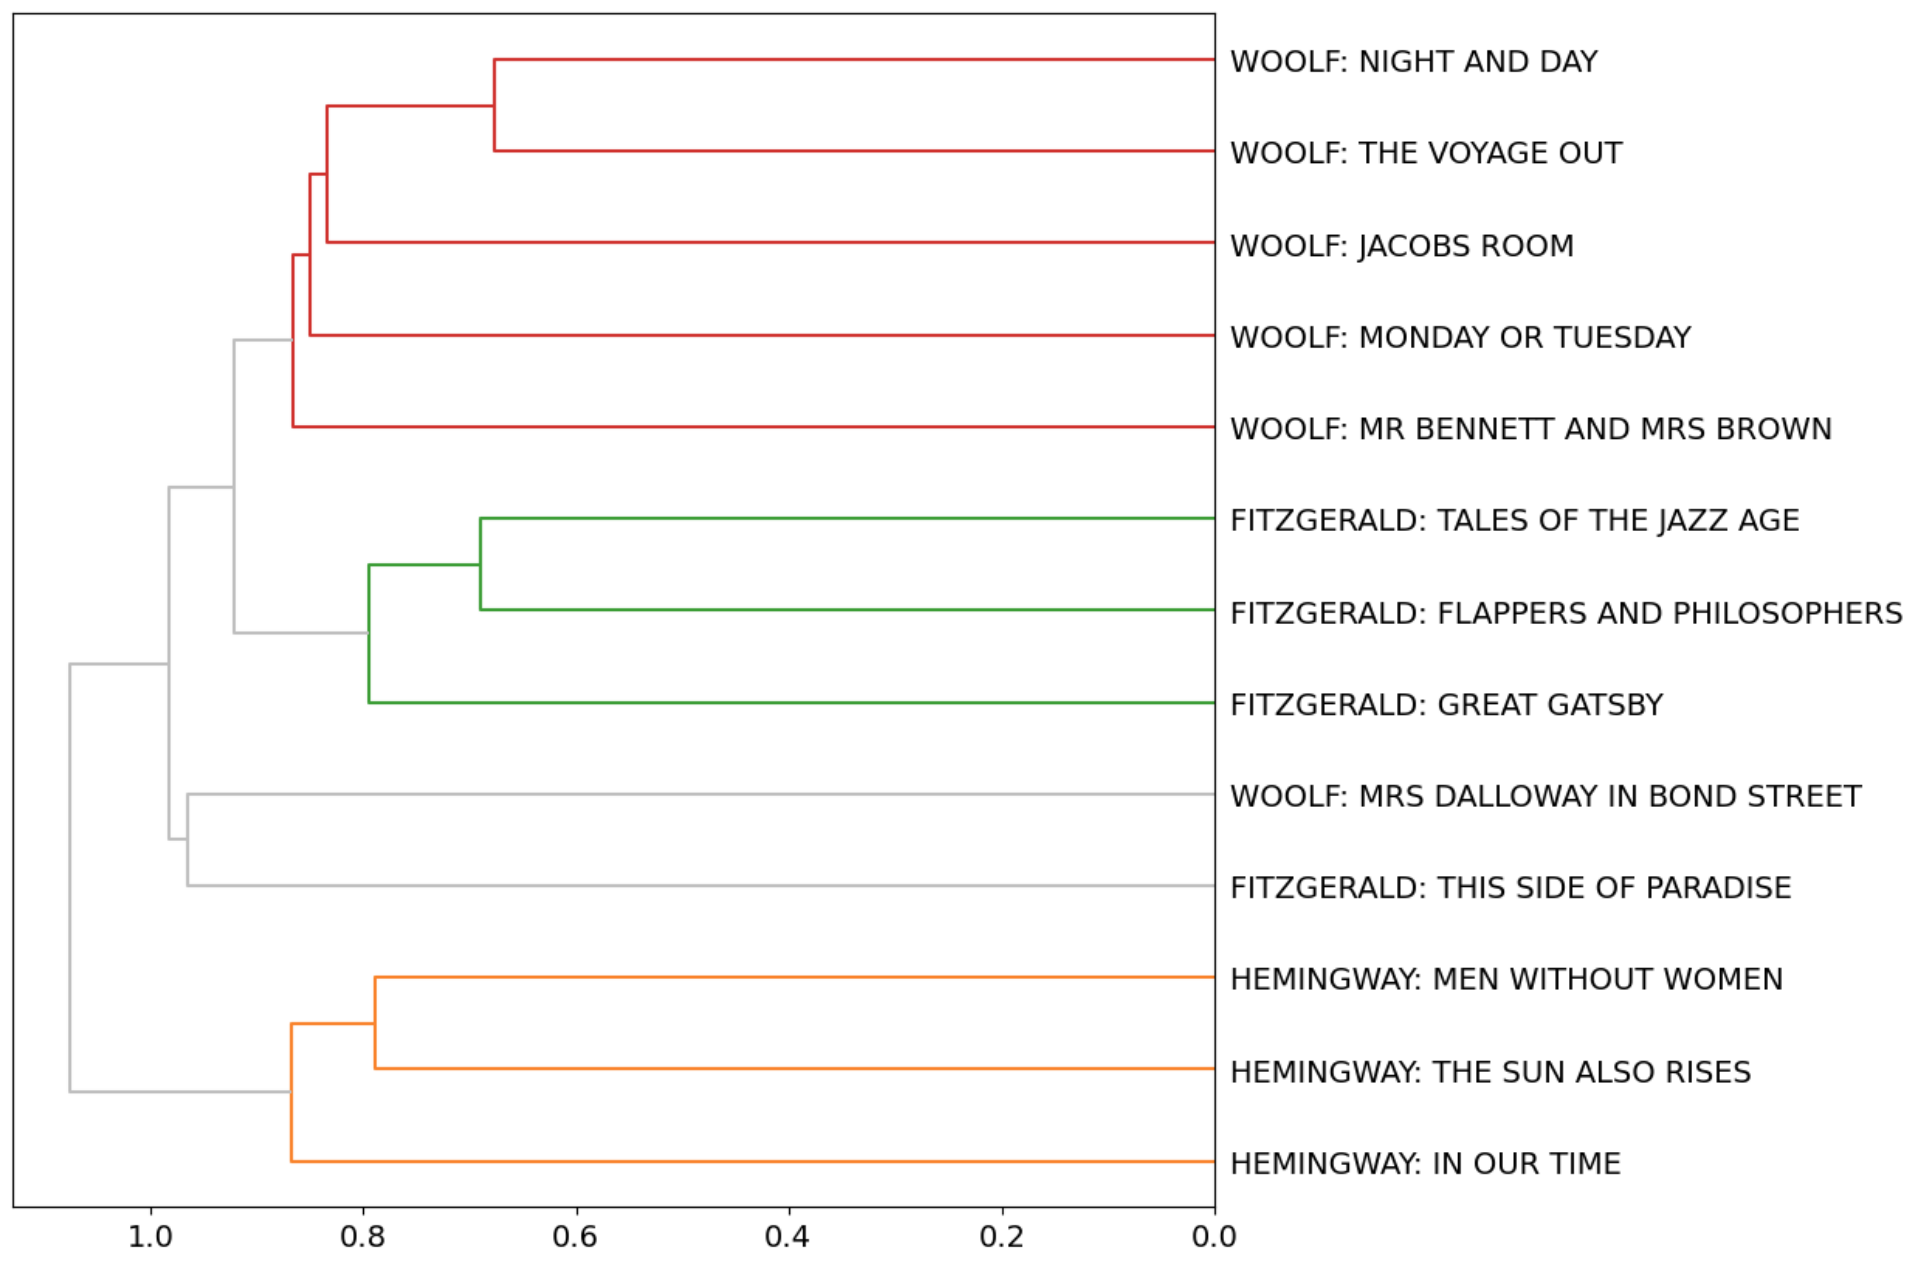

### This clustering algorithm configuration does a good job with clustering the works by author as most of the Woolf, Fitzgerald, and Hemingway works are grouped together with the exception of Mrs. Dalloway in Bond Street and This Side of Paradise. The dendrogram also shows that the works of Fitzgerald and Woolf are more similar than the works of Fitzgerald and Hemingway which is interesting because Hemingway and Fitzgerald are both American authors and I thought their works would have been more similar.
### Another dendrogram that provides insight into the similar documents was the dendrogram was the cityblock similarity measure with a weighted linkage method. The dendrogram is below. 

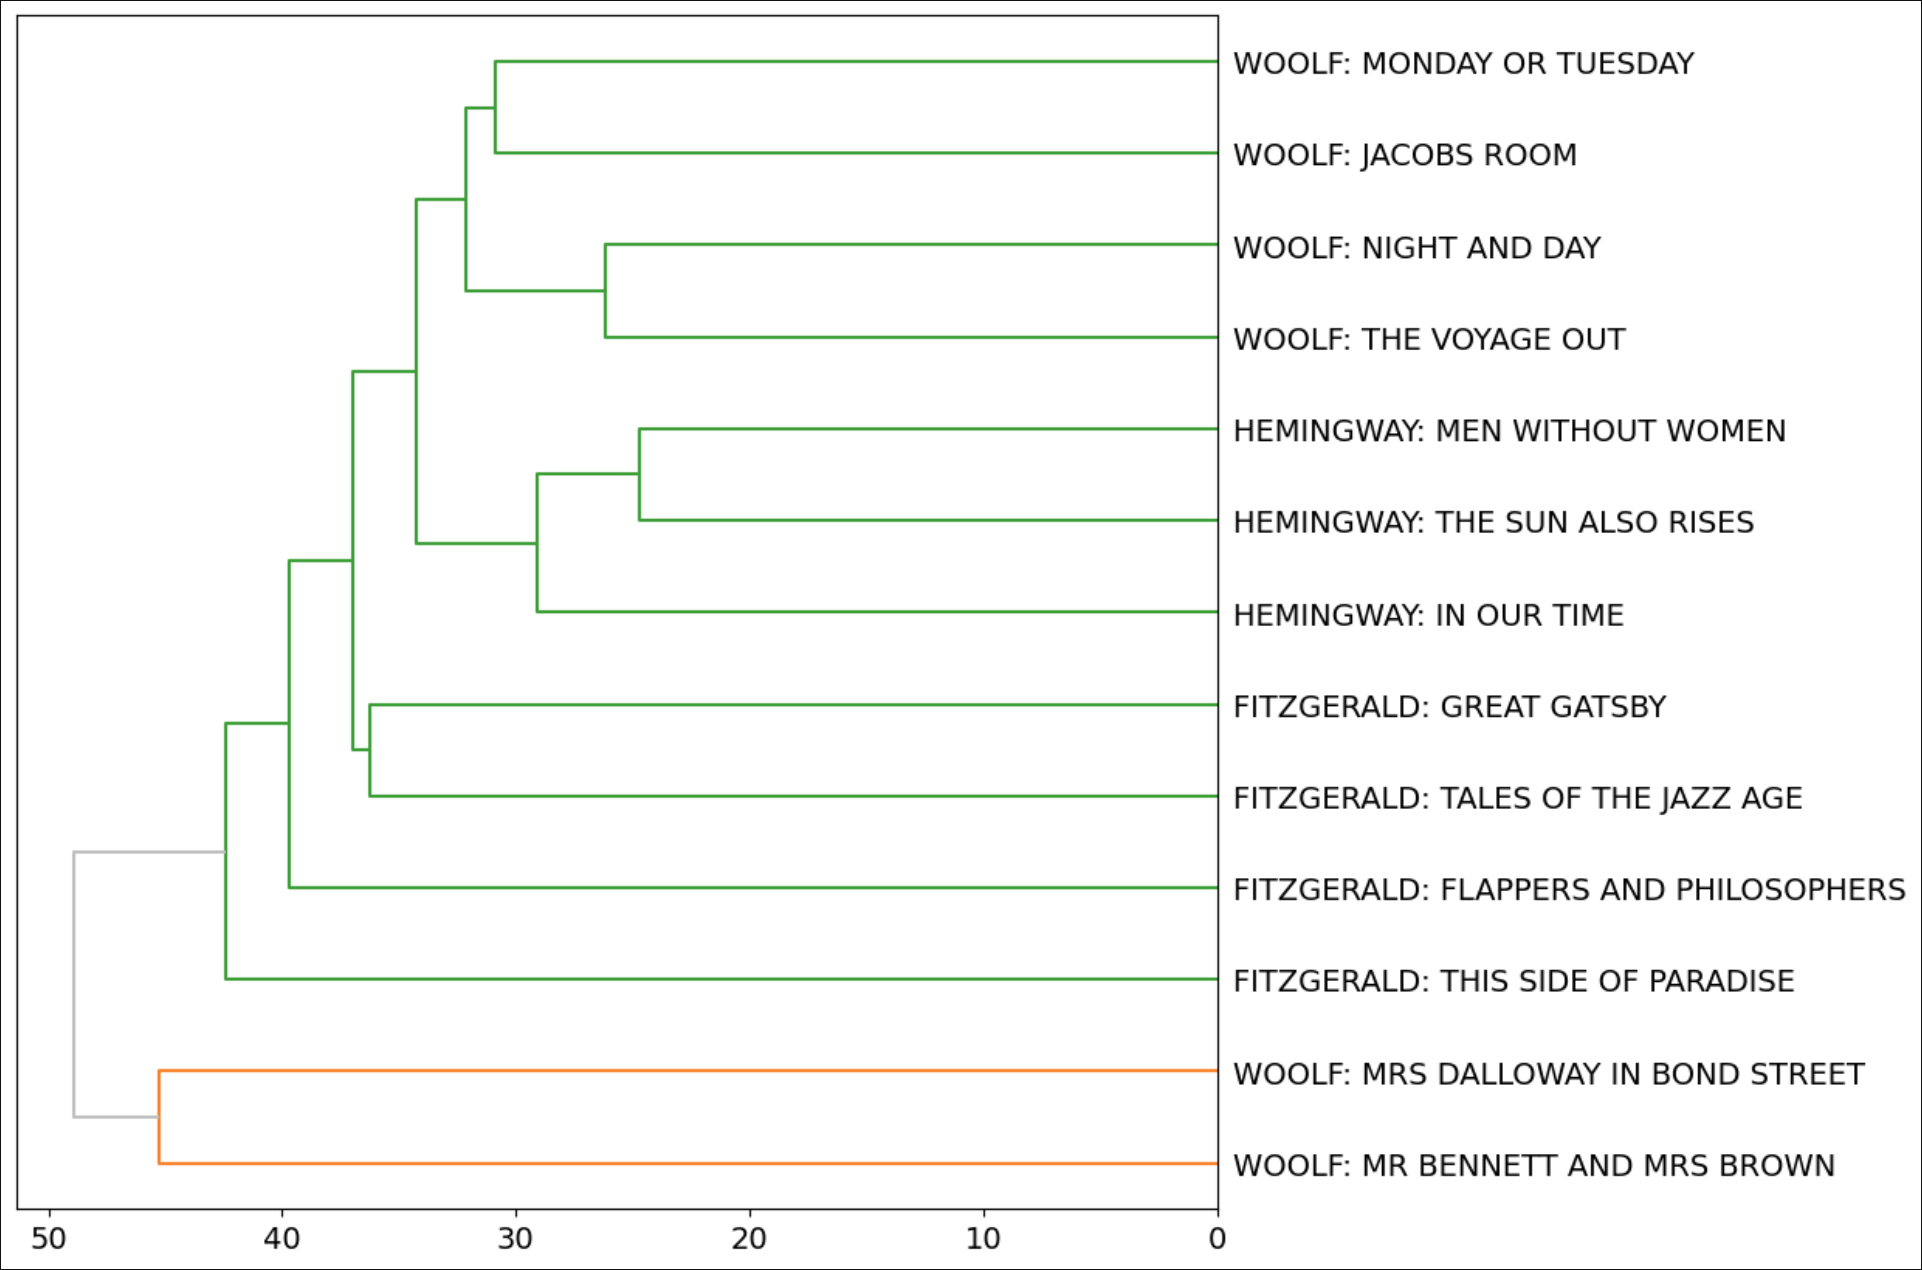

### The cityblock dendrogram shows that Hemingway and Woolf are closer together than Fitzgerald with two of the Woolf works further from the rest. The cityblock dendrogram also shows that the documents are further away from one another as compared to the cosine similarity dendrogram.  

### The second exploration I did with the data was a PCA or Principal Components Analysis. For this exploration, I first created a Bag of Words from the entire corpus and then I made a TFIDF Table from the Bag of Words function. Once I had the TFIDF table, I ran that table through the PCA function that I had created. The PCA analysis returned the three tables of loadings, dcm, and comps. The visualization below shows the first plot from plotting the dcm table with the color being author.  

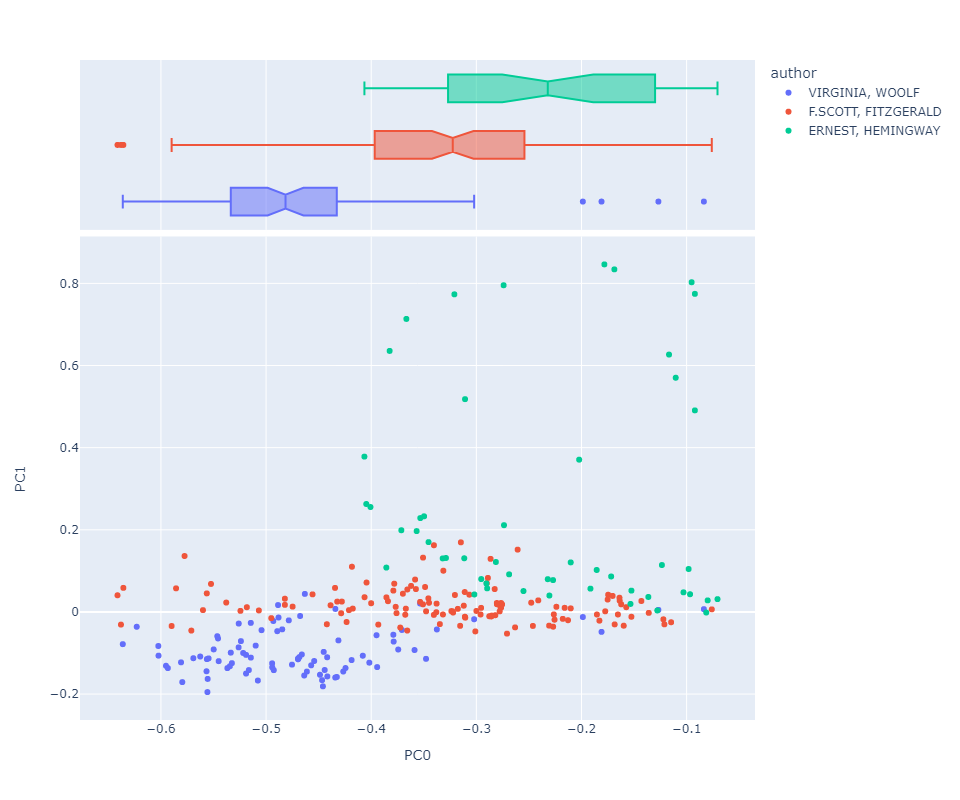

### This graph shows the spread of each of the chapters by authors. As seen in the graphic, the authors have a consistent spread over the first principal component, but the second principal component in the y direction shows that Woolf's chapters seem to be towards the bottom, with Fitzgerald's next, and then Hemingway at the top. 
### The texts are then explored looking at the second and third principal components and this does a good job with keeping the texts from the same author close together as well. 

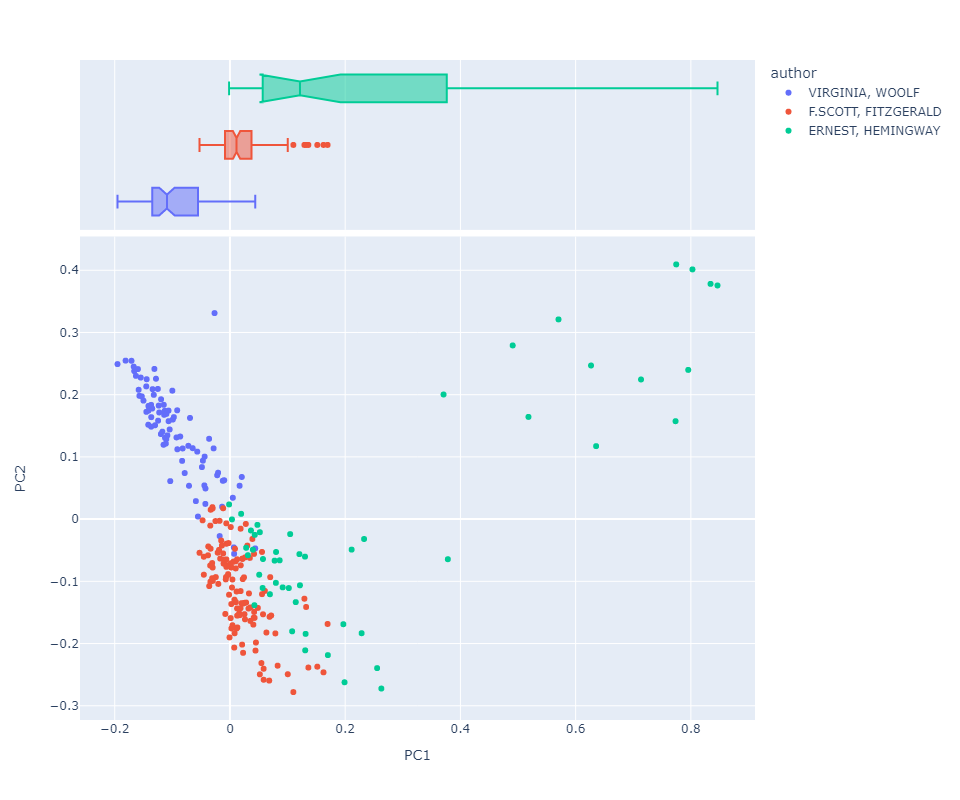

### Along the third principal component or PC2 in the image, it does an even better job clustering the authors works together. Once again, Hemingway's chapters are more variant in the second principal component or PC1 in the image direction as compared to the Fitzgerald and Woolf. 
### As for the meanings of the principal components, the first principal component or PC0 in the first image is mainly focused around the idea of family as the negative end of PC0 has terms such as life, mother, table, car and others and the positive end has terms such as muscle, wise, and thumb which are more individual focused. The second principal component or PC1 in the images is dealing with more feminine words such as tea, books, and thought on the negative end while the positive end has terms such as bull, crowd, and drunk. This makes sense that Virginia Woolf's works are towards the negative end of PC1 since she was a very feminist writer and wrote works based on women's sufferage and other topics, as compared to Fitzgerald and Hemingway which are in the middle and at the other end of the scale for PC1 which represents more masculine concepts which Hemingway did write about in some of his works. Lastly, for the third principal component or PC2 in the second image represents the relationship to subjective and objective as the negative end has terms such as car, dance, girl, and money which are all objective things as compared to the positive end which are subjective with terms such as thoughts, feelings, and truth. Again, Woolf seems to fall on the positive end of the component while Fitzgerald fell on the negative side mostly, while Hemingway was on both sides depending on the work.         

### The third exploration that was conducted was Latent Dirichlet Allocation or LDA. First, the Corpus table went  through the topic model class that was created. This outputted the three tables that were described above of the theta, phi, and topics tables which allowed for analysis to be conducted on the topics of the corpus and which author each of the topics related to the most. The results of the table are shown below for which topics related to which authors.   

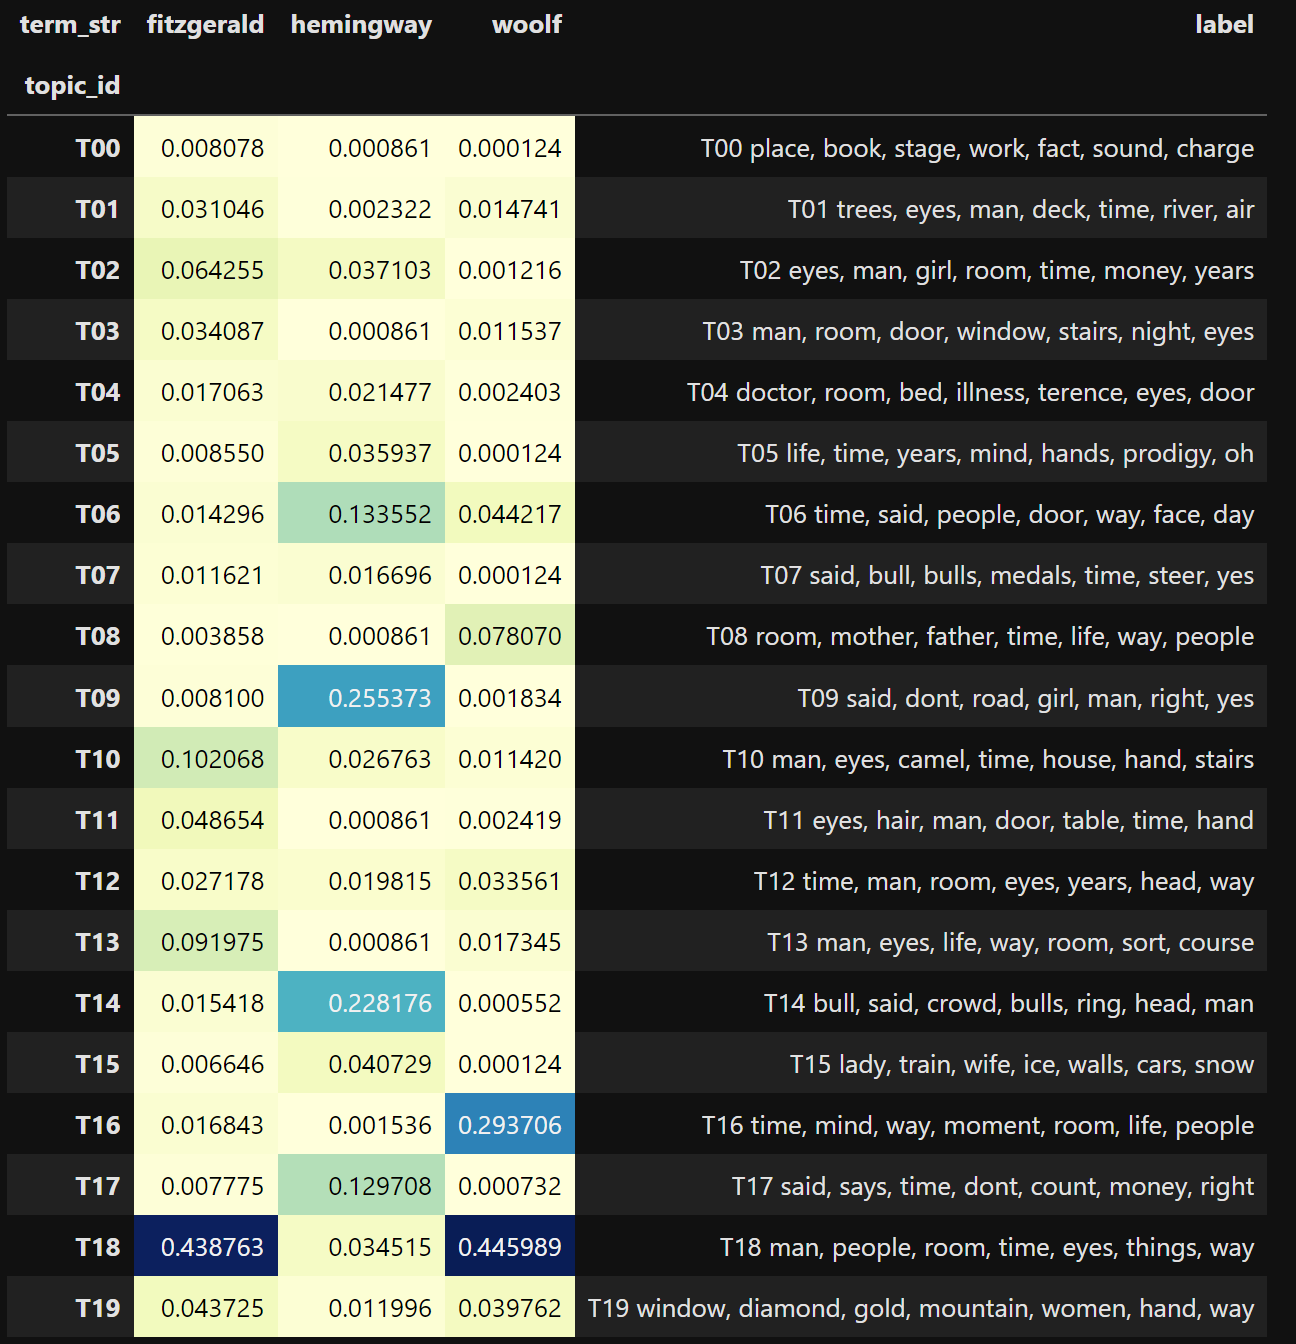

### As seen in the image different topics are associated with more and less with different authors. For example, Topic 19 or T18 in the image, man, people, room, time, eyes, things, way is associated with Fitzgerald and Woolf, but not so much with Hemingway. Also Topic 15 or T14 in the image is associated with Hemingway but not so much with Fitzgerald and Woolf. Also, Topic 11 or T10 in the image is associated with Fitzgerald but not as much with Hemingway and Woolf. This seems to show that there were some topics that the authors had in common but others that are only related to one author more than the others.   

### The fourth exploration was conducted on the data was a word2vec model. This model establishes word embeddings to the corpus and allows for each author to have a different corpus for their specific works. Thus, first the corpus tables were made for each of the authors. Then, lib tables were made for each of the authors along with the vocabulary tables for each author. After these tables were made, the corpus and vocabulary tables were passed through the word2vec class for each author. The analogies function allowed for different terms used in each specific author's vocabualry to be examined and different analogies for each author. The analogies that were created for each author are listed below.   

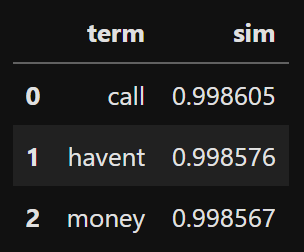

### The results from the first analogy, which was made from the Fitzgerald corpus and vocabulary are above. The analogy was man is to love as woman is to and then these three words were what was to be found to fit the analogy the best. It is not surprising the money comes up when this analogy is made because Fitzgerald was writing during the time of the 1910s, 1920s, and 1930s which were a time where women were looking for partners who had money. It is also true that men were looking to be loved by a woman, thus this analogy does make sense in terms of this author and corpus.  

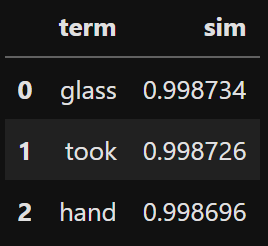

### The results of the second analogy made from the Hemingway corpus and vocabulary are above. The analogy was day is to bottle as night is to and then the three words seen above. It is interesting to see that glass is at the top of this list, although it is not surprising. Many of Hemingway's works involve alchohol in some way and this could be one way of showing as the day goes on, the way that people drink is getting more sophisticated. When people in Hemingway's works are going for dinner they might be having wine or some liquor that is out of the glass as compared to when they might be drinking during the day, they might be having a beer out of a bottle. Thus, this analogy also makes sense.  

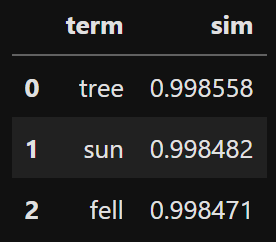

### The results of third and final analogy that comes from Woolf's corpus and vocabulary tables are above. The analogy for Woolf was man is to road as woman is to and then the three words that fit the analogy best. It turns out that tree and sun are the two top words when it comes to this analogy. It is interesting to see how these two things do interact with the road. For the tree, it is usually found beside the road, and for the sun it is usually shining down on the road. This could show how Woolf thinks about the relationship between a man and a woman, as the man could be getting worn down while the woman is there to help him out when needed. It could also be saying that the woman might not need the man as she can be powerful like the sun or the tree.   

### The fifth and final exploration that was done on the data was a sentiment analysis of the corpus. The sentiment analysis will allow each work in the corpus to get assigned a sentiment value from negative one to one based on eight different emotions. The SALEX sentiments were used for the analysis which assigns terms sentiment value. Then, that table was inner joined with the vocabulary table of the entire corpus and then that new table was joined with the Bag of Words table to get the table with sentiments for all words in all the works. Below is the sentiments for all of the texts in the corpus.     

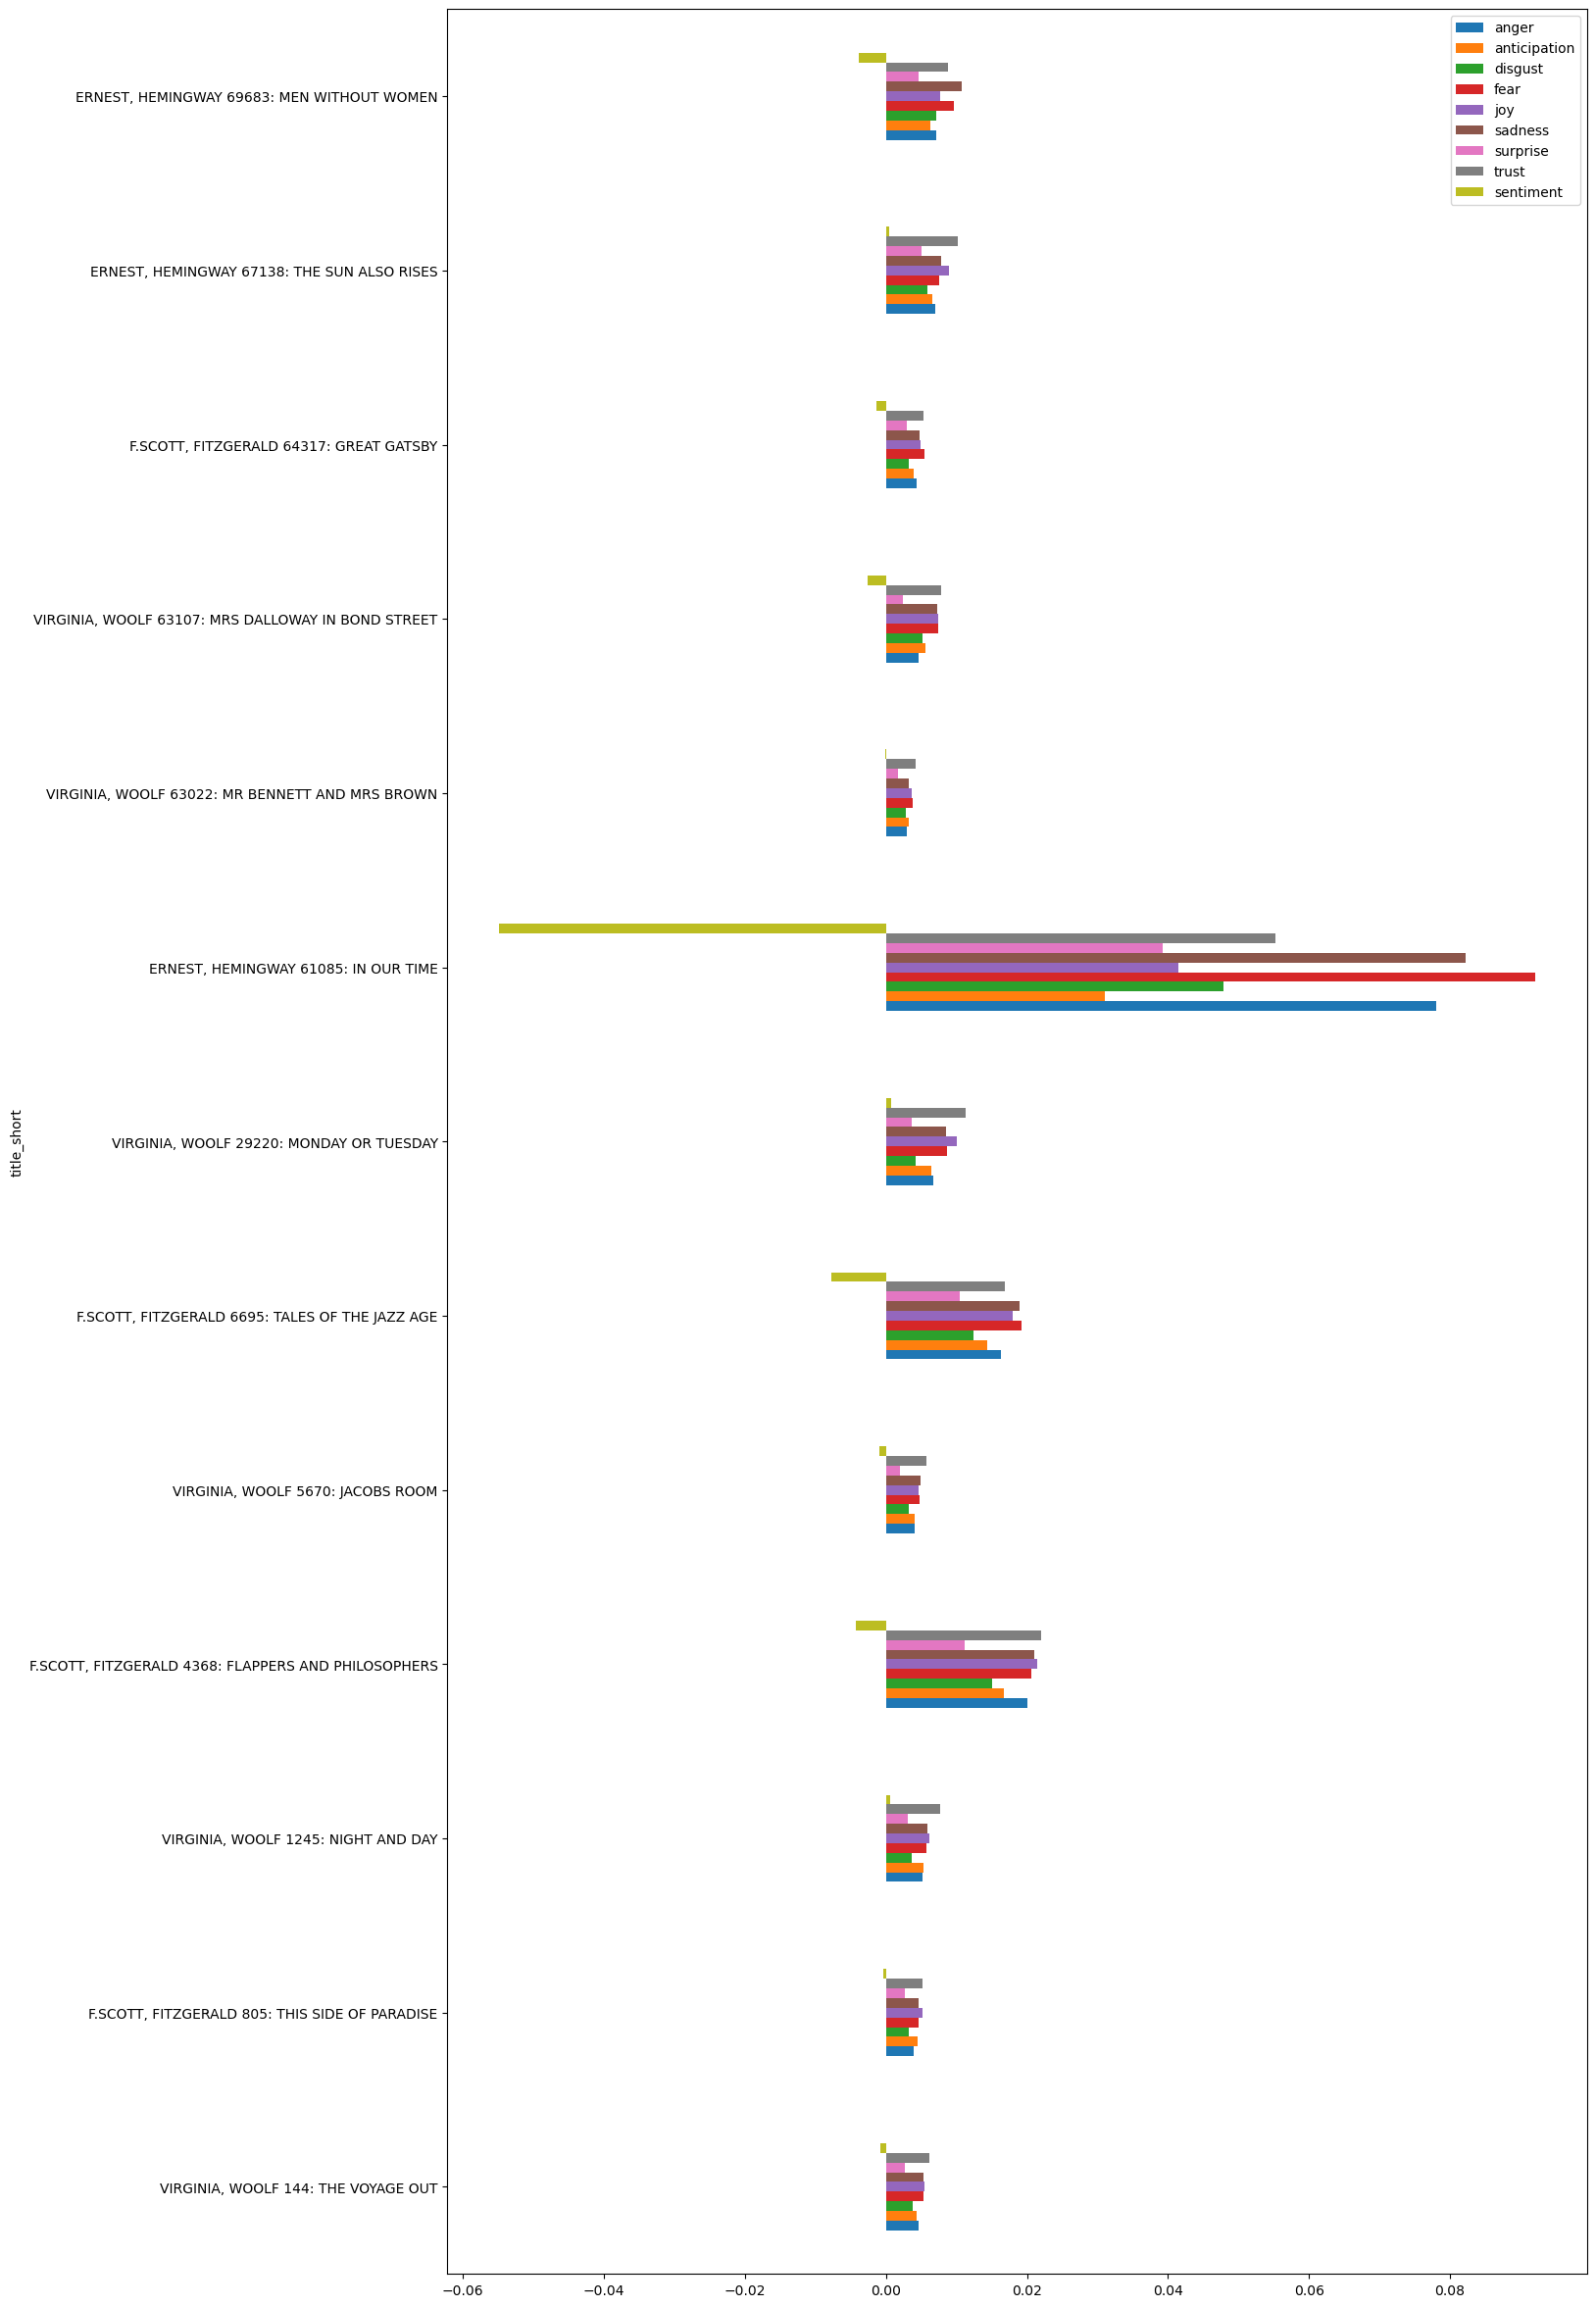

### The plot above shows that most of the texts in the corpus have overall sentiment that is around the 0 mark or neutral. However, there is one text that is more negative than the rest and that is Ernest Hemingway's In Our Time. This text has the three highest emotions being fear, anger, and sadness, which is to be expected from a work that is so negative in overall sentiment. The text that is the most positive in terms of sentiment is Virginia Woolf's Monday or Tuesday. Monday or Tuesday does not have the same value in terms of magnitude as In Our Time. It is also not surprising that the texts two highest emotions are trust and joy. It is also interesting that Monday or Tuesday is a collection of short stories from Woolf and it might end up being positive in nature because most of the stories might be positive, but more research would need to be conducted to see if that was true. Below is the table of sentiment for each book, for each emotions with the numbers since they are not reported on the chart.  

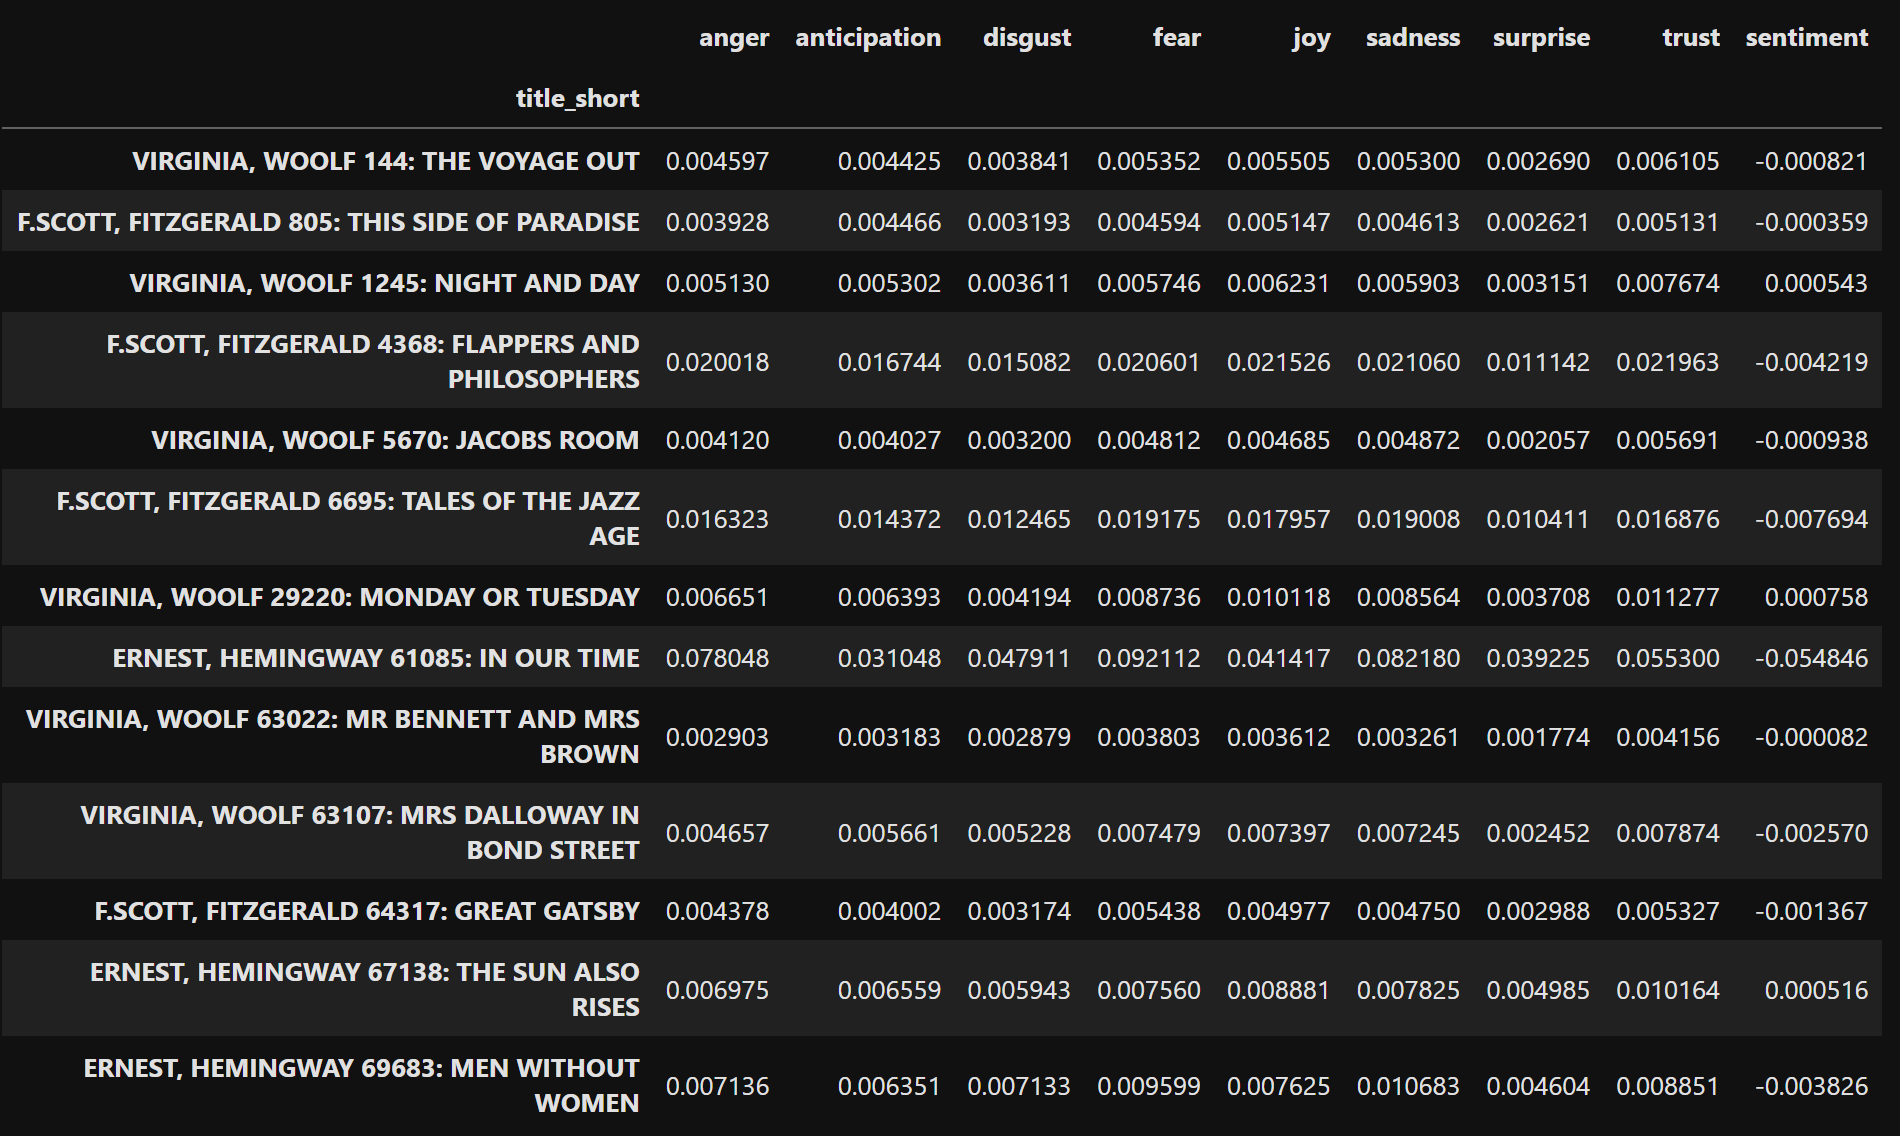

# Interpretation

### The conclusions that were found in the exploration section were somewhat similar to what was expected. The clustering algorithm of the texts showed that the works by the authors were able to be clustered together. The Hemingway-Woolf and Fitzgerald-Woolf similarity was surprising, considering the author's nationalities. The principal components analysis revealed that principal components represented different concepts. Woolf's works were more towards the subjective side of the component as the other two were more objective. The Latent Dirichlet Allocation showed that some topics were similar between authors. Topic 19 or T18 in the images shows that this topic was most related to Woolf and Fitzgerald. Hemingway also has topics that are most related to him by a lot compared to the other two. The word embeddings showed analogies that could be related back to the work of the authors. The Hemingway analogy with the overarching theme of alcohol is one analogy that does a good job of relating the work to the world at the time. Lastly, the sentiment analysis showed the In Our Time was very negative in terms of sentiment and that the sentiment of the works seemed to be similar.    